## Kiva - Machine Learning - Clustering: 

<b>This script contains the following: 

1. Importing libraries and data and renaming columns <br>
2. The Elbow technique <br>
3. k-Means clustering <br>
4. Silhouette coefficient 
</b> 

### 1. Importing libraries and data and renaming columns 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib 
import matplotlib.pyplot as plt
import os 
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# This option ensures the graphs are displayed in the notebook

%matplotlib inline

In [3]:
path = r'/Users/admin/Desktop/Kiva Data Analysis'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'kiva_loans_cleaned.csv'))

In [5]:
df.shape

(671205, 21)

In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'funded_amount', 'loan_amount', 'activity',
       'sector', 'use', 'country_code', 'country', 'region', 'currency',
       'partner_id', 'posted_time', 'disbursed_time', 'funded_time',
       'term_in_months', 'lender_count', 'tags', 'borrower_genders',
       'repayment_interval', 'date'],
      dtype='object')

In [7]:
df.head()

,Unnamed: 0,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,...,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,...,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,...,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,...,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,...,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,...,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [8]:
df.describe()

,Unnamed: 0,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,671205.000000,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,335602.000000,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,193760.338052,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,0.000000,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,167801.000000,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,335602.000000,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,503403.000000,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,671204.000000,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


<b><i>Data wrangling</b></i>

In [9]:
# Drop non-numeric columns not needed for k-Means algorithm

df.drop(columns = ['Unnamed: 0', 'id', 'activity', 'sector', 'use', 'country_code', 'country', 'region', 'currency', 'partner_id', 'posted_time', 'disbursed_time', 'funded_time', 'tags', 'borrower_genders', 'repayment_interval', 'date'])
    

,funded_amount,loan_amount,term_in_months,lender_count
0,300.0,300.0,12.0,12
1,575.0,575.0,11.0,14
2,150.0,150.0,43.0,6
3,200.0,200.0,11.0,8
4,400.0,400.0,14.0,16
...,...,...,...,...
671200,0.0,25.0,13.0,0
671201,25.0,25.0,13.0,1
671202,0.0,25.0,13.0,0
671203,0.0,25.0,13.0,0


In [10]:
df_k = df.drop(columns = ['Unnamed: 0', 'id', 'activity', 'sector', 'use', 'country_code', 'country', 'region', 'currency', 'partner_id', 'posted_time', 'disbursed_time', 'funded_time', 'tags', 'borrower_genders', 'repayment_interval', 'date'])


In [11]:
df_k.head()

,funded_amount,loan_amount,term_in_months,lender_count
0,300.0,300.0,12.0,12
1,575.0,575.0,11.0,14
2,150.0,150.0,43.0,6
3,200.0,200.0,11.0,8
4,400.0,400.0,14.0,16


### 2. The Elbow techinque 

In [12]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data 
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above

In [13]:
# Creates a score that represents a rate of variation for the given cluster option

score = [kmeans[i].fit(df_k).score(df_k) for i in range(len(kmeans))] 

In [14]:
score

[-1822635415718.106,
 -812941198320.5599,
 -561638573224.3751,
 -354015328794.3224,
 -246641238582.09357,
 -183147914251.1921,
 -151865232954.84262,
 -129622740222.2012,
 -110867154490.9758]

#### <i>Double checking to confirm the data is ready</i> 

In [15]:
df_k.describe()

,funded_amount,loan_amount,term_in_months,lender_count
count,671205.000000,671205.000000,671205.000000,671205.000000
mean,785.995061,842.397107,13.739022,20.590922
std,1130.398941,1198.660073,8.598919,28.459551
min,0.000000,25.000000,1.000000,0.000000
25%,250.000000,275.000000,8.000000,7.000000
50%,450.000000,500.000000,13.000000,13.000000
75%,900.000000,1000.000000,14.000000,24.000000
max,100000.000000,100000.000000,158.000000,2986.000000


In [16]:
# Remove extreme values from "loan_count" column 
# Based on the previous task, 99% of the loans were under 55,000 USD 

df_k[df_k['loan_amount'] <= 55000] # less than or equal to 55,000 USD 

,funded_amount,loan_amount,term_in_months,lender_count
0,300.0,300.0,12.0,12
1,575.0,575.0,11.0,14
2,150.0,150.0,43.0,6
3,200.0,200.0,11.0,8
4,400.0,400.0,14.0,16
...,...,...,...,...
671200,0.0,25.0,13.0,0
671201,25.0,25.0,13.0,1
671202,0.0,25.0,13.0,0
671203,0.0,25.0,13.0,0


In [17]:
# Check for missing values 

df_k.isnull().sum() # No missing values 

funded_amount     0
loan_amount       0
term_in_months    0
lender_count      0
dtype: int64

#### <i>Data is ready for the elbow techinque</i>

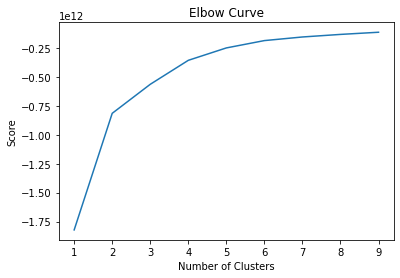

In [18]:
# Plot the elbow curve using PyLab 

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### There's a large jump from 1 to 2 on the x-axis, but after that, the curve straightens out. This means the optimal count for the clusters is 2. 

### 3. k-Means clustering

In [19]:
# Create the k-means object 

kmeans = KMeans(n_clusters = 2, n_jobs = -1)

In [20]:
# Fit the k-means object to the data 

kmeans.fit(df_k)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=2, n_jobs=-1)

In [21]:
df_k['clusters'] = kmeans.fit_predict(df_k)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [23]:
df_k.head()

,funded_amount,loan_amount,term_in_months,lender_count,clusters
0,300.0,300.0,12.0,12,0
1,575.0,575.0,11.0,14,0
2,150.0,150.0,43.0,6,0
3,200.0,200.0,11.0,8,0
4,400.0,400.0,14.0,16,0


In [24]:
df_k['clusters'].value_counts()

0    629639
1     41566
Name: clusters, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

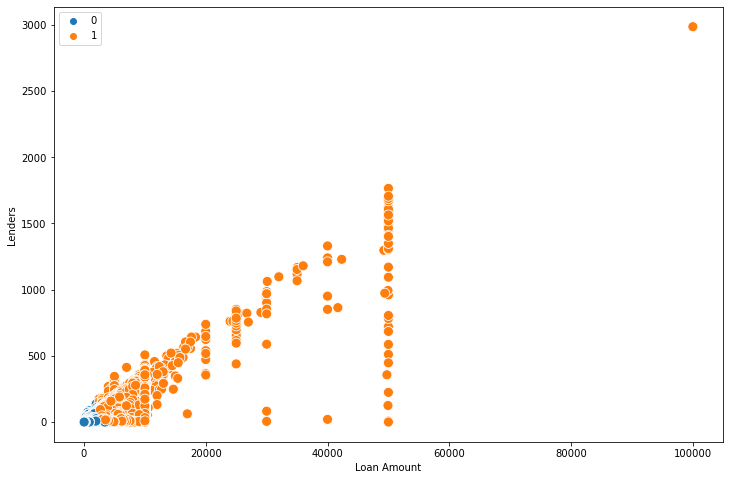

In [38]:
# Plot the clusters for the "loan_amount" and "lender_count" variables 
# Subset `X` for the x and y arguments to avoid using their labels 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm
# `s` represents the size of the points you want to see in the plot.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['loan_amount'], y=df_k['lender_count'], hue=kmeans.labels_, s=100)
ax.grid(False) # This removes the grid from the background
plt.xlabel('Loan Amount') # Label x-axis
plt.ylabel('Lenders') # Label y-axis
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

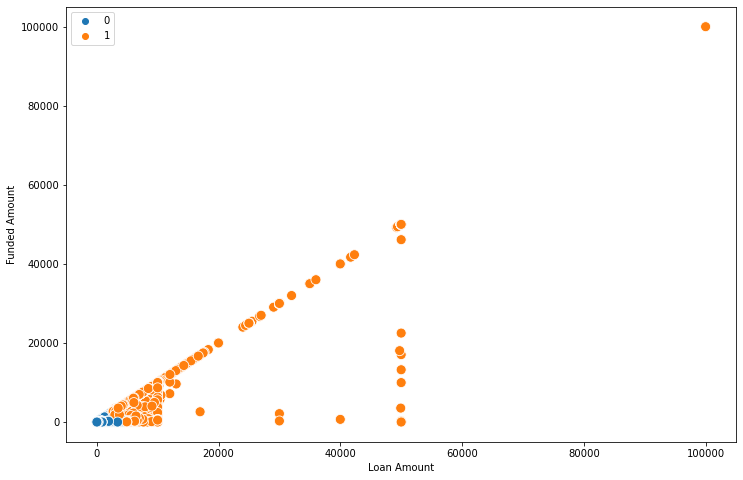

In [42]:
# Plot the clusters for the "loan_amount" and "funded_amount" variables 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['loan_amount'], y=df_k['funded_amount'], hue=kmeans.labels_, s=100)
ax.grid(False) # This removes the grid from the background
plt.xlabel('Loan Amount') # Label x-axis
plt.ylabel('Funded Amount') # Label y-axis
plt.show

In [39]:
df_k.loc[df_k['clusters'] == 0, 'cluster'] = 'blue'
df_k.loc[df_k['clusters'] == 1, 'cluster'] = 'orange'

In [40]:
df_k.groupby('cluster').agg({'funded_amount':['mean', 'median'], 
                         'loan_amount':['mean', 'median'], 
                         'term_in_months':['mean', 'median'],
                          'lender_count':['mean', 'median']})

funded_amount          loan_amount         term_in_months         \
                 mean  median         mean  median           mean median   
cluster                                                                    
blue       571.287817   425.0   611.765393   450.0      13.592501   13.0   
orange    4038.366092  3500.0  4335.990954  3750.0      15.958500    9.0   

        lender_count         
                mean median  
cluster                      
blue       16.453407     12  
orange     83.265722     79